In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
DATA_PATH = "../data/"
TRAIN_PATH = os.path.join(DATA_PATH, "Train.csv")
IMGS_PATH = os.path.join(DATA_PATH, "images")

In [12]:
## reading data
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952


#### Goals
- Find most representative bounding boxes

In [13]:
df_train["width"] = df_train["xmax"] - df_train["xmin"]
df_train["height"] = df_train["ymax"] - df_train["ymin"]
df_train["size"] = df_train["width"]*df_train["height"]
df_train["aspect"] = df_train["width"]/df_train["height"]

In [14]:
df_train.describe()

,confidence,ymin,xmin,ymax,xmax,width,height,size,aspect
count,41029.0,41029.000000,41029.000000,41029.000000,41029.000000,41029.000000,41029.000000,4.102900e+04,41027.000000
mean,1.0,1096.986018,1665.664444,1321.627860,1927.684518,262.020074,224.641842,1.099898e+05,1.233444
std,0.0,682.484829,973.855104,714.825614,1026.212994,285.314835,229.443849,2.394695e+05,0.634176
min,1.0,0.000000,0.000000,30.998991,17.225673,0.000000,0.000000,0.000000e+00,0.091703
25%,1.0,566.046875,886.775362,744.048622,1066.148385,84.355617,76.975155,6.767207e+03,0.842865
50%,1.0,994.930609,1568.155180,1246.348948,1838.952447,151.307757,136.164596,2.094541e+04,1.114922
75%,1.0,1551.876065,2363.446657,1810.713525,2663.181818,332.064043,289.003820,9.383579e+04,1.456650
max,1.0,4295.942029,5908.600181,4480.000000,6567.427798,3079.176365,2581.551619,4.618730e+06,14.262997


In [15]:
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax,width,height,size,aspect
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928,13.164474,13.458059,177.168266,0.978185
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724,9.426809,13.277961,125.168801,0.709959
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645,11.738487,18.666118,219.111985,0.628866
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316,14.240132,17.316612,246.590831,0.822339
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952,412.160044,183.688598,75709.100730,2.243798


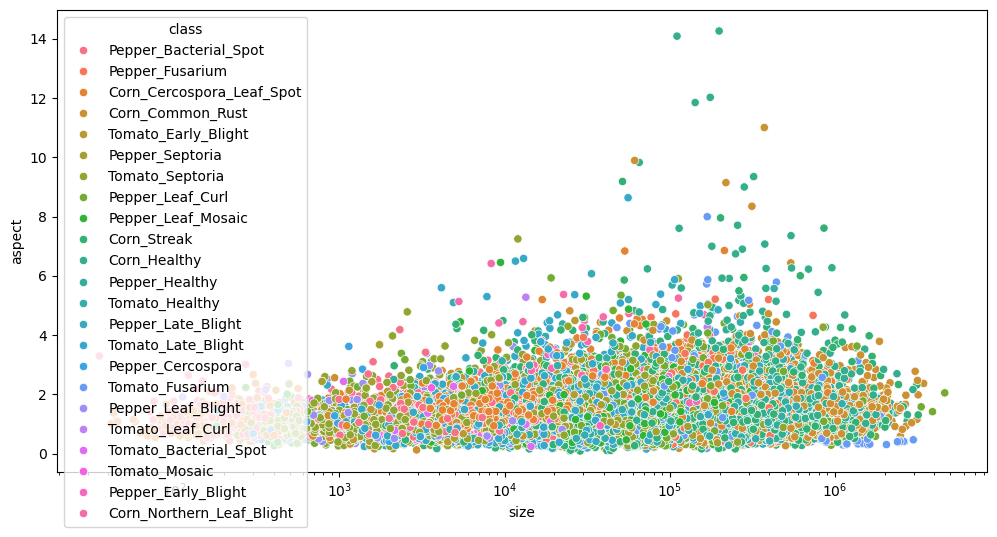

In [16]:
figure = plt.figure(figsize=(12,6))
sns.scatterplot(df_train, x="size", y="aspect", hue="class")
plt.xscale("log")
# plt.axhline(1)
# plt.xlim((10000,100000))
plt.show()

### Testing Hypotheses

In [17]:
def sampling_dist(data, sample_size=1000, num_samples=100):
    np.random.seed(42)
    means = []
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))

    std = np.std(data)/np.sqrt(sample_size)
    return means, std

def get_z(data, means, sampling_std):
    data_mean = np.mean(data)
    sampling_mean = np.mean(means)
    return  (data_mean - sampling_mean)/sampling_std

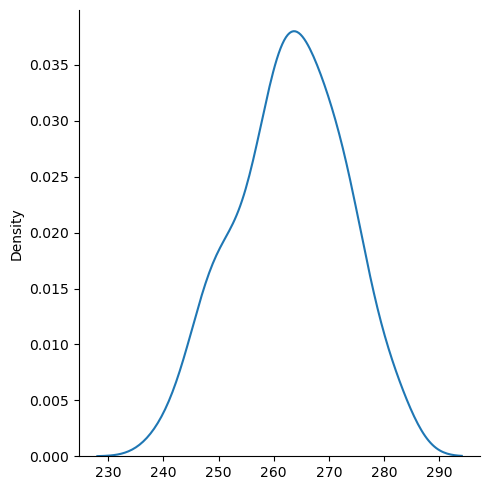

In [18]:
feature = "width"
means,sampling_dist_std = sampling_dist(df_train[feature])
sns.displot(means, kind="kde")

In [19]:
# get_z(df_train[df_train["class"]=="Corn_Common_Rust"]["size"], means, sampling_dist_std)
for cat in df_train["class"].unique():
    z = get_z(df_train[df_train["class"]==cat][feature], means, sampling_dist_std)
    print(cat,z)

Pepper_Bacterial_Spot -21.73228648539697
Pepper_Fusarium 25.74594385079674
Corn_Cercospora_Leaf_Spot -13.414282388635932
Corn_Common_Rust 62.33579950305617
Tomato_Early_Blight -13.680373762852517
Pepper_Septoria -6.405864194093942
Tomato_Septoria -14.27170646079667
Pepper_Leaf_Curl 5.794667685869957
Pepper_Leaf_Mosaic -1.6516070435226804
Corn_Streak 24.057559593589193
Corn_Healthy 52.07223901093033
Pepper_Healthy 33.811271321635004
Tomato_Healthy 7.7104569104534155
Pepper_Late_Blight -13.558772036796507
Tomato_Late_Blight -11.478290499816957
Pepper_Cercospora -21.650806848606702
Tomato_Fusarium 13.290595661442463
Pepper_Leaf_Blight -18.452723431176892
Tomato_Leaf_Curl 5.703010882699648
Tomato_Bacterial_Spot -18.996133975685314
Tomato_Mosaic -4.001953595254088
Pepper_Early_Blight -5.660234313658252
Corn_Northern_Leaf_Blight -0.47912419141050694


In [20]:
df_train["class"].value_counts()

class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Fusarium               472
Pepper_Cercospora             472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

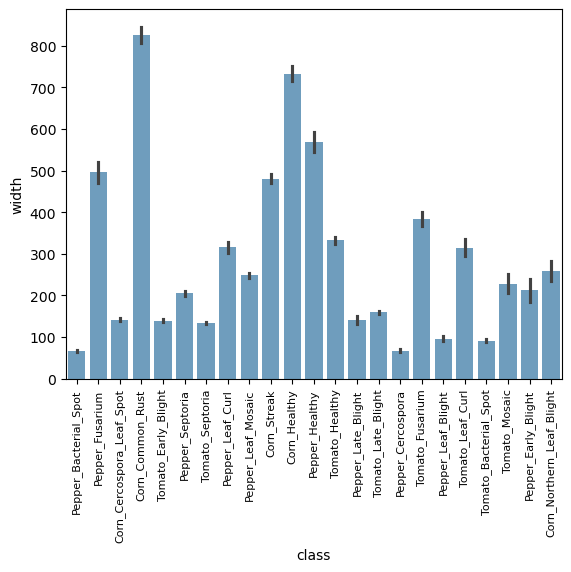

In [21]:
sns.barplot(df_train, x="class", y="width", alpha=0.7)
# sns.barplot(df_train, x="class", y="height", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [22]:
df_train[df_train["class"] == "Tomato_Fusarium"]["aspect"].mean()

1.2576141028137067

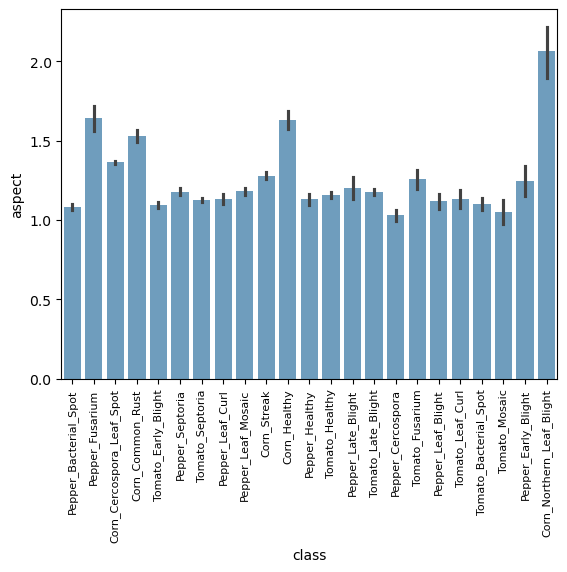

In [23]:
sns.barplot(df_train, x="class", y="aspect", alpha=0.7)
# sns.barplot(df_train, x="class", y="aspect", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [24]:
df_train.groupby("class")[["width", "aspect"]].mean()

,width,aspect
class,,
Corn_Cercospora_Leaf_Spot,142.000048,1.363409
Corn_Common_Rust,825.442839,1.532577
Corn_Healthy,732.841534,1.628663
Corn_Northern_Leaf_Blight,258.705409,2.063376
Corn_Streak,480.083646,1.280128
Pepper_Bacterial_Spot,66.952209,1.080750
Pepper_Cercospora,67.687346,1.030957
Pepper_Early_Blight,211.959685,1.246842
Pepper_Fusarium,495.316819,1.642730


In [25]:
temp = pd.read_csv("../submissions/submission_10.csv")
disease = "Corn_Streak"
temp[temp["class"] == disease].sort_values("confidence", ascending=False)["confidence"].mean()

FileNotFoundError: [Errno 2] No such file or directory: '../submissions/submission_10.csv'

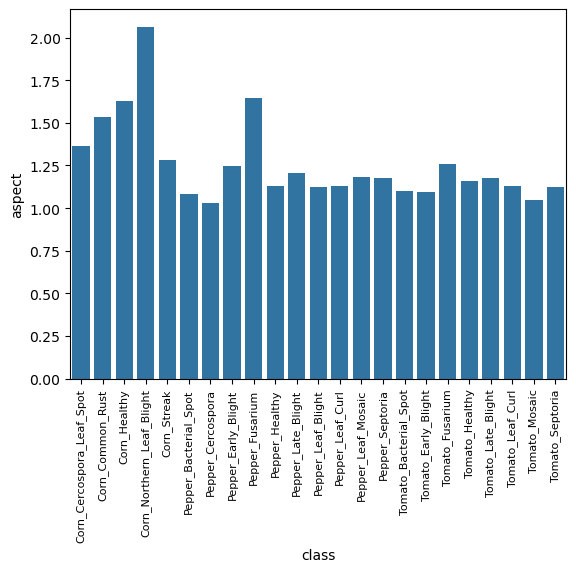

In [26]:
sns.barplot(df_train.groupby("class")["aspect"].mean())
plt.xticks(rotation=90, size=8)
plt.show()

In [16]:
df_train.groupby(["Image_ID", "class"]).count()["confidence"].max()

56

<Axes: >

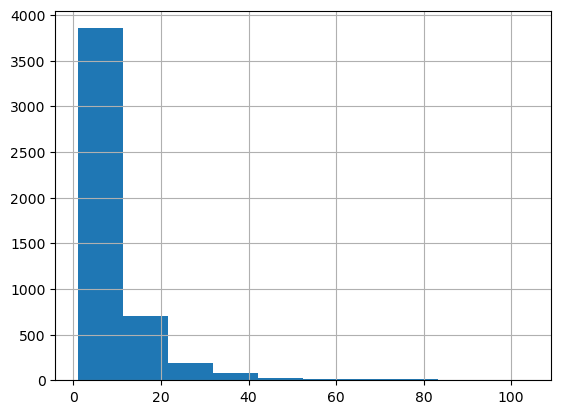

In [17]:
df_train.groupby("Image_ID").count()["confidence"].hist()

## Finding mean overlap of boxes

In [27]:
from torchvision.ops import box_iou
import torch

In [28]:
def find_mean_iou(df, col="Image_ID"):
    ids = df[col].unique()
    mean_ious_per_img = []
    for id in ids:
        boxes = df_train[df_train[col] == id][["xmin", "ymin", "xmax", "ymax"]].values
        boxes = torch.from_numpy(boxes.astype(np.float32))

        if len(boxes) == 1:
            mean_ious_per_img.append(0)
            continue
            
        ious = box_iou(boxes, boxes)
        ious = np.triu(ious, 1)
        mean_iou = ious.sum()/sum(range(len(boxes)))
        mean_ious_per_img.append(mean_iou)

    return mean_ious_per_img


def miou_per_class_per_image(df, group=["Image_ID", "class"]):
    mean_ious = []
    for gname, gval in df.groupby(group):
        boxes = gval[["xmin", "ymin", "xmax", "ymax"]].values
        boxes = torch.from_numpy(boxes.astype(np.float32))

        if len(boxes) == 1:
            mean_ious.append(0)
            continue
            
        ious = box_iou(boxes, boxes)
        ious = np.triu(ious, 1)
        mean_iou = ious.sum()/sum(range(len(boxes)))
        mean_ious.append(mean_iou)

    return mean_ious
        

In [29]:
miou = find_mean_iou(df_train)

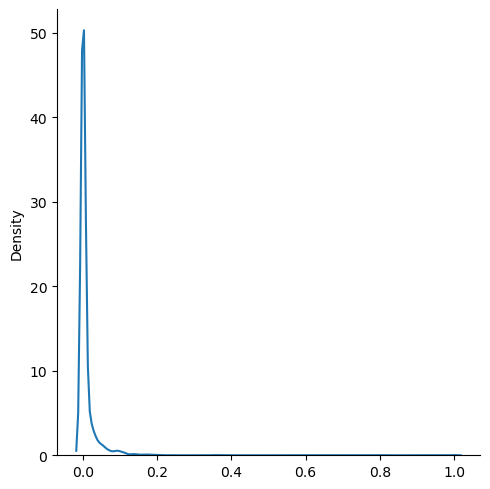

In [30]:
sns.displot(miou, kind="kde")

In [31]:
mious = miou_per_class_per_image(df_train)

NameError: name 'cpi' is not defined

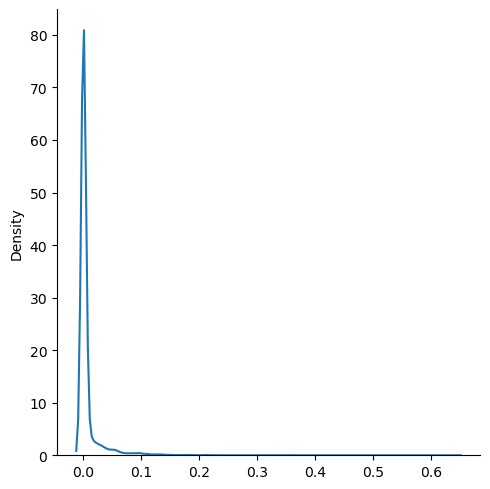

In [32]:
sns.displot(mious, kind="kde")/cpi

## Clustering for bounding boxes

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_train[["width", "aspect"]])

In [ ]:
df_train

In [ ]:
temp = df_train.groupby(["Image_ID", "class"]).count().reset_index()

temp[temp["class"] == "Corn_Cercospora_Leaf_Spot"]

In [ ]:
temp = df_train.groupby(["Image_ID", "class"]).count().reset_index()

In [ ]:
temp = df_train.drop_duplicates(subset=["Image_ID"], keep="last")
temp.groupby("class").sample(n=6, random_state=config.SEED)["class"].value_counts()

## INSPECTING DUPLICATE BOUNDING BOXES

In [36]:
df_train = pd.read_csv(TRAIN_PATH)

In [44]:
without_duplicate_bboxes = df_train.drop_duplicates(subset=["xmin", "ymin", "xmax", "ymax"])
without_duplicate_bboxes_idxs = without_duplicate_bboxes.index

duplicate_bboxes = df_train[~df_train.index.isin(without_duplicate_bboxes_idxs)]

duplicate_bboxes["class"].unique()

array(['Tomato_Septoria', 'Pepper_Septoria', 'Tomato_Late_Blight',
       'Pepper_Late_Blight', 'Tomato_Leaf_Curl', 'Tomato_Mosaic',
       'Pepper_Early_Blight', 'Tomato_Early_Blight', 'Pepper_Leaf_Curl',
       'Corn_Cercospora_Leaf_Spot', 'Pepper_Fusarium', 'Tomato_Fusarium',
       'Pepper_Leaf_Mosaic', 'Pepper_Cercospora', 'Corn_Common_Rust',
       'Pepper_Leaf_Blight', 'Corn_Streak', 'Pepper_Bacterial_Spot'],
      dtype=object)

In [131]:
# without_duplicate_bboxes.to_csv("../data/Train_no_dup_bboxes.csv", index=False)

In [47]:
duplicate_bboxes[duplicate_bboxes["class"].isin(["Corn_Common_Rust", "Tomato_Septoria"])].sort_values("xmin")

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
35723,id_us8f9q.jpg,1.0,Tomato_Septoria,340.124249,0.000000,618.274299,166.197408
20721,id_mzkn5j.jpg,1.0,Tomato_Septoria,1596.758830,0.000000,1912.346693,315.638993
26055,id_t5sgaw.jpg,1.0,Tomato_Septoria,2203.421844,0.000000,2428.380135,444.549962
39431,id_oz3acb.jpg,1.0,Tomato_Septoria,908.011961,0.000000,1001.186310,100.594102
38371,id_us8f9q.jpg,1.0,Tomato_Septoria,2060.938001,1.881480,2371.400802,500.035875
...,...,...,...,...,...,...,...
32852,id_mzkn5j.jpg,1.0,Tomato_Septoria,1551.438126,3810.778174,1671.989542,3880.061608
40106,id_mzkn5j.jpg,1.0,Tomato_Septoria,1293.883016,3837.225394,1384.654622,3936.790008
14896,id_grbz67.jpg,1.0,Tomato_Septoria,1145.149674,3878.819121,1289.349762,4006.676935
14893,id_grbz67.jpg,1.0,Tomato_Septoria,1336.978520,3881.351427,1495.192635,4030.449850


In [49]:
duplicate_bboxes["class"].value_counts()

class
Tomato_Septoria              1172
Pepper_Septoria              1162
Tomato_Late_Blight            310
Pepper_Late_Blight            296
Pepper_Early_Blight            55
Tomato_Mosaic                  50
Tomato_Early_Blight            50
Tomato_Leaf_Curl               48
Pepper_Leaf_Mosaic              4
Tomato_Fusarium                 4
Corn_Cercospora_Leaf_Spot       3
Pepper_Leaf_Curl                3
Corn_Common_Rust                2
Pepper_Fusarium                 1
Pepper_Cercospora               1
Pepper_Leaf_Blight              1
Corn_Streak                     1
Pepper_Bacterial_Spot           1
Name: count, dtype: int64

In [118]:
temp = without_duplicate_bboxes[~without_duplicate_bboxes["Image_ID"].isin(duplicate_bboxes["Image_ID"])]["class"].value_counts()
doubles_removed_classes = set(temp.index)
temp

class
Corn_Cercospora_Leaf_Spot    6523
Tomato_Septoria              3958
Corn_Streak                  3149
Tomato_Late_Blight           3077
Tomato_Healthy               2853
Pepper_Leaf_Mosaic           2083
Pepper_Bacterial_Spot        1941
Tomato_Early_Blight          1781
Corn_Common_Rust             1672
Corn_Healthy                 1548
Pepper_Leaf_Curl             1514
Tomato_Fusarium               877
Pepper_Healthy                736
Pepper_Leaf_Blight            505
Tomato_Bacterial_Spot         482
Pepper_Cercospora             469
Pepper_Fusarium               462
Tomato_Leaf_Curl              264
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                  23
Name: count, dtype: int64

In [120]:
set(df_train["class"].unique()) - doubles_removed_classes

{'Pepper_Early_Blight', 'Pepper_Late_Blight', 'Pepper_Septoria'}

In [114]:
duplicate_bboxes["class"].value_counts()

class
Tomato_Septoria              1172
Pepper_Septoria              1162
Tomato_Late_Blight            310
Pepper_Late_Blight            296
Pepper_Early_Blight            55
Tomato_Mosaic                  50
Tomato_Early_Blight            50
Tomato_Leaf_Curl               48
Pepper_Leaf_Mosaic              4
Tomato_Fusarium                 4
Corn_Cercospora_Leaf_Spot       3
Pepper_Leaf_Curl                3
Corn_Common_Rust                2
Pepper_Fusarium                 1
Pepper_Cercospora               1
Pepper_Leaf_Blight              1
Corn_Streak                     1
Pepper_Bacterial_Spot           1
Name: count, dtype: int64

### Displaying images

In [72]:
from skimage import io
import random

In [104]:
def show_imgs(img_paths, titles=None, nrows=2, ncols=2):
    images = [io.imread(os.path.join(img_path)) for img_path in img_paths]
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,8))
    axes = axes.flatten()

    for index, image in enumerate(images):
        axes[index].imshow(image)
        axes[index].axis(False)

        if titles:
            axes[index].set_title(titles[index])

    plt.axis(False)
    plt.show()

In [58]:
df_train = pd.read_csv(TRAIN_PATH)

In [66]:
grouped_imgs = df_train.groupby("class")["Image_ID"].agg(list)

In [125]:
image_classes = ["Tomato_Healthy", "Pepper_Healthy", "Tomato_Septoria", "Pepper_Septoria"]
paths = []
titles = []

seed = 1260
rng = np.random.default_rng(seed)
for image_class in image_classes:
    selected_img = rng.choice(grouped_imgs[image_class])
    path = os.path.join(IMGS_PATH, selected_img)
    paths.append(path)
    titles.append(image_class)

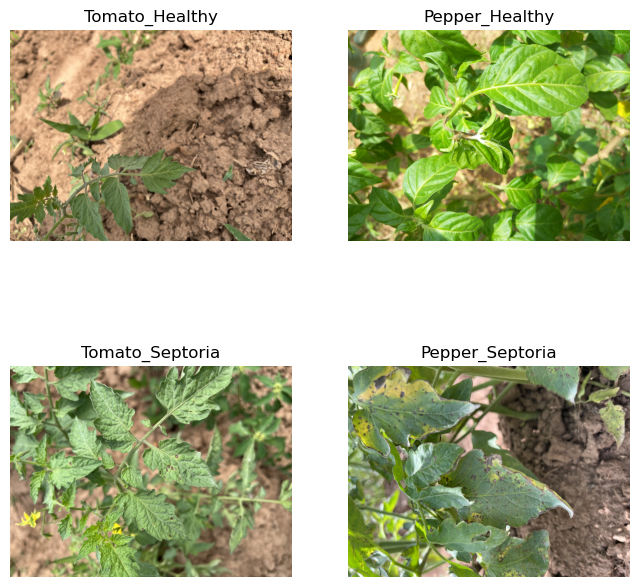

In [126]:
show_imgs(paths, titles=titles)

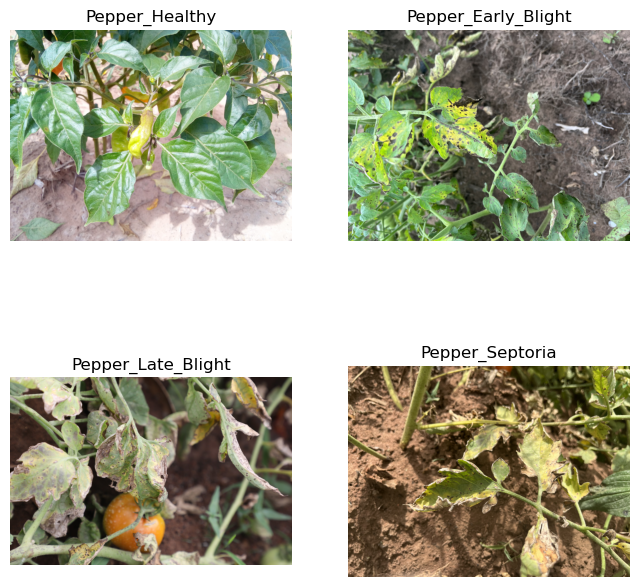

In [122]:
image_classes = ["Pepper_Healthy", "Pepper_Early_Blight", "Pepper_Late_Blight", "Pepper_Septoria"]
paths = []
titles = []

seed = 42
rng = np.random.default_rng(seed)
for image_class in image_classes:
    selected_img = rng.choice(grouped_imgs[image_class])
    path = os.path.join(IMGS_PATH, selected_img)
    paths.append(path)
    titles.append(image_class)

show_imgs(paths, titles=titles)